In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mlp
import seaborn as sns
%matplotlib inline
import scipy.stats as stats
import pylab

# READING DATASET 

In [3]:
dt = pd.read_csv('heart.csv')

In [4]:
dt.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
dt.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
dt.shape


(303, 14)

In [7]:
dt.columns = ['age', 'gender', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [8]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   gender                   303 non-null    int64  
 2   chest_pain_type          303 non-null    int64  
 3   resting_blood_pressure   303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    int64  
 6   rest_ecg                 303 non-null    int64  
 7   max_heart_rate_achieved  303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    int64  
 11  num_major_vessels        303 non-null    int64  
 12  thalassemia              303 non-null    int64  
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

In [9]:
dt['gender'][dt['gender'] == 0] = 'female'
dt['gender'][dt['gender'] == 1] = 'male'

dt['chest_pain_type'][dt['chest_pain_type'] == 0] = 'typical angina'
dt['chest_pain_type'][dt['chest_pain_type'] == 1] = 'atypical angina'
dt['chest_pain_type'][dt['chest_pain_type'] == 2] = 'non-anginal pain'
dt['chest_pain_type'][dt['chest_pain_type'] == 3] = 'asymptomatic'

dt['fasting_blood_sugar'][dt['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
dt['fasting_blood_sugar'][dt['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

dt['rest_ecg'][dt['rest_ecg'] == 0] = 'normal'
dt['rest_ecg'][dt['rest_ecg'] == 1] = 'ST-T wave abnormality'
dt['rest_ecg'][dt['rest_ecg'] == 2] = 'left ventricular hypertrophy'

dt['exercise_induced_angina'][dt['exercise_induced_angina'] == 0] = 'no'
dt['exercise_induced_angina'][dt['exercise_induced_angina'] == 1] = 'yes'

dt['st_slope'][dt['st_slope'] == 0] = 'upsloping'
dt['st_slope'][dt['st_slope'] == 1] = 'flat'
dt['st_slope'][dt['st_slope'] == 2] = 'downsloping'

dt['thalassemia'][dt['thalassemia'] == 1] = 'normal'
dt['thalassemia'][dt['thalassemia'] == 2] = 'fixed defect'
dt['thalassemia'][dt['thalassemia'] == 3] = 'reversable defect'

<ipython-input-9-b931010ef5cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['gender'][dt['gender'] == 0] = 'female'
<ipython-input-9-b931010ef5cb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['chest_pain_type'][dt['chest_pain_type'] == 0] = 'typical angina'
<ipython-input-9-b931010ef5cb>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['fasting_blood_sugar'][dt['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
<ipyt

In [10]:
dt.head(10)

,age,gender,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,asymptomatic,145,233,greater than 120mg/ml,normal,150,no,2.3,upsloping,0,normal,1
1,37,male,non-anginal pain,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,upsloping,0,fixed defect,1
2,41,female,atypical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,downsloping,0,fixed defect,1
3,56,male,atypical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,downsloping,0,fixed defect,1
4,57,female,typical angina,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,downsloping,0,fixed defect,1
5,57,male,typical angina,140,192,lower than 120mg/ml,ST-T wave abnormality,148,no,0.4,flat,0,normal,1
6,56,female,atypical angina,140,294,lower than 120mg/ml,normal,153,no,1.3,flat,0,fixed defect,1
7,44,male,atypical angina,120,263,lower than 120mg/ml,ST-T wave abnormality,173,no,0.0,downsloping,0,reversable defect,1
8,52,male,non-anginal pain,172,199,greater than 120mg/ml,ST-T wave abnormality,162,no,0.5,downsloping,0,reversable defect,1
9,57,male,non-anginal pain,150,168,lower than 120mg/ml,ST-T wave abnormality,174,no,1.6,downsloping,0,fixed defect,1


In [11]:
dt.age.unique()

array([63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 58, 50, 66, 43, 69, 59,
       42, 61, 40, 71, 51, 65, 53, 46, 45, 39, 47, 62, 34, 35, 29, 55, 60,
       67, 68, 74, 76, 70, 38, 77], dtype=int64)

In [12]:
dt.age.value_counts()

58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
41    10
64    10
63     9
67     9
65     8
55     8
61     8
53     8
45     8
43     8
42     8
50     7
66     7
48     7
46     7
49     5
47     5
70     4
39     4
68     4
35     4
69     3
40     3
38     3
71     3
37     2
34     2
76     1
29     1
74     1
77     1
Name: age, dtype: int64

In [13]:
dt1=dt.copy(deep= True)

In [14]:
dt1.head()

,age,gender,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,asymptomatic,145,233,greater than 120mg/ml,normal,150,no,2.3,upsloping,0,normal,1
1,37,male,non-anginal pain,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,upsloping,0,fixed defect,1
2,41,female,atypical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,downsloping,0,fixed defect,1
3,56,male,atypical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,downsloping,0,fixed defect,1
4,57,female,typical angina,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,downsloping,0,fixed defect,1


In [15]:
dt.gender.unique()

array(['male', 'female'], dtype=object)

In [16]:
dt.gender.value_counts()

male      207
female     96
Name: gender, dtype: int64

In [17]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   gender                   303 non-null    object 
 2   chest_pain_type          303 non-null    object 
 3   resting_blood_pressure   303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    object 
 6   rest_ecg                 303 non-null    object 
 7   max_heart_rate_achieved  303 non-null    int64  
 8   exercise_induced_angina  303 non-null    object 
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    object 
 11  num_major_vessels        303 non-null    int64  
 12  thalassemia              303 non-null    object 
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(6), o

In [18]:
dt.chest_pain_type.unique()

array(['asymptomatic', 'non-anginal pain', 'atypical angina',
       'typical angina'], dtype=object)

In [19]:
dt.chest_pain_type.value_counts()

typical angina      143
non-anginal pain     87
atypical angina      50
asymptomatic         23
Name: chest_pain_type, dtype: int64

In [20]:
dt.resting_blood_pressure.unique()

array([145, 130, 120, 140, 172, 150, 110, 135, 160, 105, 125, 142, 155,
       104, 138, 128, 108, 134, 122, 115, 118, 100, 124,  94, 112, 102,
       152, 101, 132, 148, 178, 129, 180, 136, 126, 106, 156, 170, 146,
       117, 200, 165, 174, 192, 144, 123, 154, 114, 164], dtype=int64)

In [21]:
dt.resting_blood_pressure.value_counts()

120    37
130    36
140    32
110    19
150    17
138    13
128    12
125    11
160    11
112     9
132     8
118     7
108     6
135     6
124     6
152     5
145     5
134     5
100     4
122     4
170     4
126     3
115     3
105     3
136     3
180     3
142     3
146     2
148     2
178     2
94      2
144     2
102     2
129     1
192     1
101     1
174     1
172     1
104     1
165     1
164     1
106     1
156     1
155     1
154     1
114     1
117     1
123     1
200     1
Name: resting_blood_pressure, dtype: int64

In [22]:
dt.cholesterol.unique()

array([233, 250, 204, 236, 354, 192, 294, 263, 199, 168, 239, 275, 266,
       211, 283, 219, 340, 226, 247, 234, 243, 302, 212, 175, 417, 197,
       198, 177, 273, 213, 304, 232, 269, 360, 308, 245, 208, 264, 321,
       325, 235, 257, 216, 256, 231, 141, 252, 201, 222, 260, 182, 303,
       265, 309, 186, 203, 183, 220, 209, 258, 227, 261, 221, 205, 240,
       318, 298, 564, 277, 214, 248, 255, 207, 223, 288, 160, 394, 315,
       246, 244, 270, 195, 196, 254, 126, 313, 262, 215, 193, 271, 268,
       267, 210, 295, 306, 178, 242, 180, 228, 149, 278, 253, 342, 157,
       286, 229, 284, 224, 206, 167, 230, 335, 276, 353, 225, 330, 290,
       172, 305, 188, 282, 185, 326, 274, 164, 307, 249, 341, 407, 217,
       174, 281, 289, 322, 299, 300, 293, 184, 409, 259, 200, 327, 237,
       218, 319, 166, 311, 169, 187, 176, 241, 131], dtype=int64)

In [23]:
dt.cholesterol.value_counts()

204    6
197    6
234    6
269    5
212    5
      ..
215    1
210    1
200    1
195    1
417    1
Name: cholesterol, Length: 152, dtype: int64

In [24]:
dt.columns

Index(['age', 'gender', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')

In [25]:
dt.fasting_blood_sugar.unique()

array(['greater than 120mg/ml', 'lower than 120mg/ml'], dtype=object)

In [26]:
dt.fasting_blood_sugar.value_counts()


lower than 120mg/ml      258
greater than 120mg/ml     45
Name: fasting_blood_sugar, dtype: int64

In [27]:
dt.rest_ecg.unique()

array(['normal', 'ST-T wave abnormality', 'left ventricular hypertrophy'],
      dtype=object)

In [28]:
dt.rest_ecg.value_counts()

ST-T wave abnormality           152
normal                          147
left ventricular hypertrophy      4
Name: rest_ecg, dtype: int64

In [29]:
dt.max_heart_rate_achieved.value_counts()

162    11
163     9
160     9
152     8
173     8
       ..
128     1
129     1
134     1
137     1
202     1
Name: max_heart_rate_achieved, Length: 91, dtype: int64

In [30]:
dt.columns

Index(['age', 'gender', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')

In [31]:
dt.max_heart_rate_achieved.unique()

array([150, 187, 172, 178, 163, 148, 153, 173, 162, 174, 160, 139, 171,
       144, 158, 114, 151, 161, 179, 137, 157, 123, 152, 168, 140, 188,
       125, 170, 165, 142, 180, 143, 182, 156, 115, 149, 146, 175, 186,
       185, 159, 130, 190, 132, 147, 154, 202, 166, 164, 184, 122, 169,
       138, 111, 145, 194, 131, 133, 155, 167, 192, 121,  96, 126, 105,
       181, 116, 108, 129, 120, 112, 128, 109, 113,  99, 177, 141, 136,
        97, 127, 103, 124,  88, 195, 106,  95, 117,  71, 118, 134,  90],
      dtype=int64)

In [32]:
dt.exercise_induced_angina.unique()

array(['no', 'yes'], dtype=object)

In [33]:
dt.exercise_induced_angina.value_counts()

no     204
yes     99
Name: exercise_induced_angina, dtype: int64

In [34]:
dt.st_depression.value_counts()

0.0    99
1.2    17
1.0    14
0.6    14
0.8    13
1.4    13
0.2    12
1.6    11
1.8    10
0.4     9
2.0     9
0.1     7
2.6     6
2.8     6
1.9     5
0.5     5
1.5     5
3.0     5
2.2     4
3.6     4
0.3     3
2.4     3
0.9     3
4.0     3
3.4     3
2.3     2
1.1     2
4.2     2
3.2     2
2.5     2
3.5     1
1.3     1
3.8     1
6.2     1
5.6     1
3.1     1
2.9     1
4.4     1
0.7     1
2.1     1
Name: st_depression, dtype: int64

In [35]:
dt.st_depression.value_counts()

0.0    99
1.2    17
1.0    14
0.6    14
0.8    13
1.4    13
0.2    12
1.6    11
1.8    10
0.4     9
2.0     9
0.1     7
2.6     6
2.8     6
1.9     5
0.5     5
1.5     5
3.0     5
2.2     4
3.6     4
0.3     3
2.4     3
0.9     3
4.0     3
3.4     3
2.3     2
1.1     2
4.2     2
3.2     2
2.5     2
3.5     1
1.3     1
3.8     1
6.2     1
5.6     1
3.1     1
2.9     1
4.4     1
0.7     1
2.1     1
Name: st_depression, dtype: int64

In [36]:
dt.columns

Index(['age', 'gender', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')

In [37]:
dt.st_slope.unique()

array(['upsloping', 'downsloping', 'flat'], dtype=object)

In [38]:
dt.st_slope.value_counts()

downsloping    142
flat           140
upsloping       21
Name: st_slope, dtype: int64

In [39]:
dt.num_major_vessels.value_counts()

0    175
1     65
2     38
3     20
4      5
Name: num_major_vessels, dtype: int64

In [40]:
dt.num_major_vessels.unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [41]:
dt.thalassemia.unique()

array(['normal', 'fixed defect', 'reversable defect', 0], dtype=object)

In [42]:
dt.thalassemia.value_counts()

fixed defect         166
reversable defect    117
normal                18
0                      2
Name: thalassemia, dtype: int64

# CHECK FOR OUTLIERS

{'whiskers': [<matplotlib.lines.Line2D at 0x20d3ae6a5e0>,
 'caps': [<matplotlib.lines.Line2D at 0x20d3ae6aca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20d3ae6a280>],
 'medians': [<matplotlib.lines.Line2D at 0x20d3b50e3a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x20d3b50e700>],
 'means': []}

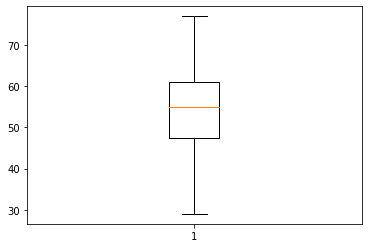

In [43]:
mlp.boxplot(dt.age)

{'whiskers': [<matplotlib.lines.Line2D at 0x20d3c5a9100>,
 'caps': [<matplotlib.lines.Line2D at 0x20d3c5a97c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20d3c599d30>],
 'medians': [<matplotlib.lines.Line2D at 0x20d3c5a9e80>],
 'fliers': [<matplotlib.lines.Line2D at 0x20d3c5b3220>],
 'means': []}

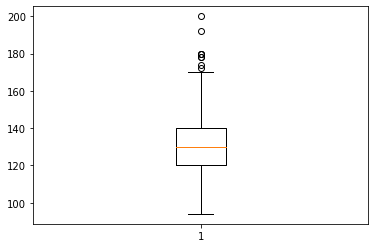

In [44]:
mlp.boxplot(dt.resting_blood_pressure)

{'whiskers': [<matplotlib.lines.Line2D at 0x20d3c605bb0>,
 'caps': [<matplotlib.lines.Line2D at 0x20d3c6122b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20d3c605850>],
 'medians': [<matplotlib.lines.Line2D at 0x20d3c612970>],
 'fliers': [<matplotlib.lines.Line2D at 0x20d3c612cd0>],
 'means': []}

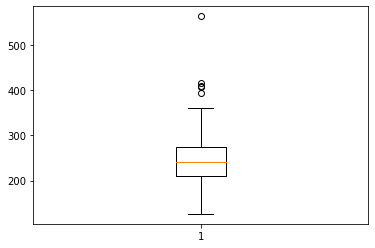

In [45]:
mlp.boxplot(dt.cholesterol)

{'whiskers': [<matplotlib.lines.Line2D at 0x20d3c663880>,
 'caps': [<matplotlib.lines.Line2D at 0x20d3c663f40>,
 'boxes': [<matplotlib.lines.Line2D at 0x20d3c663580>],
 'medians': [<matplotlib.lines.Line2D at 0x20d3c66f640>],
 'fliers': [<matplotlib.lines.Line2D at 0x20d3c66f9a0>],
 'means': []}

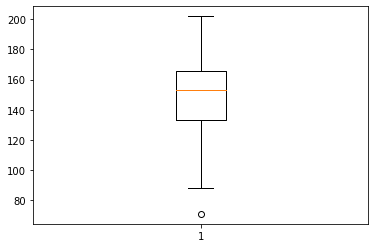

In [46]:
mlp.boxplot(dt.max_heart_rate_achieved)

{'whiskers': [<matplotlib.lines.Line2D at 0x20d3c6c9910>,
 'caps': [<matplotlib.lines.Line2D at 0x20d3c6c9fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20d3c6c9610>],
 'medians': [<matplotlib.lines.Line2D at 0x20d3c6d66d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x20d3c6d6a30>],
 'means': []}

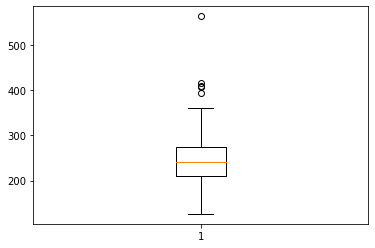

In [47]:
mlp.boxplot(dt.cholesterol)

{'whiskers': [<matplotlib.lines.Line2D at 0x20d3c728460>,
 'caps': [<matplotlib.lines.Line2D at 0x20d3c728b20>,
 'boxes': [<matplotlib.lines.Line2D at 0x20d3c728160>],
 'medians': [<matplotlib.lines.Line2D at 0x20d3c731220>],
 'fliers': [<matplotlib.lines.Line2D at 0x20d3c7315b0>],
 'means': []}

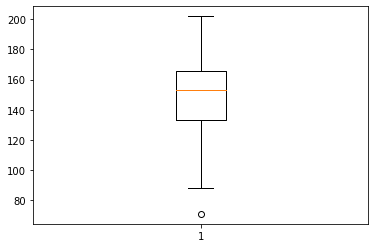

In [48]:
mlp.boxplot(dt.max_heart_rate_achieved)

{'whiskers': [<matplotlib.lines.Line2D at 0x20d3c7870d0>,
 'caps': [<matplotlib.lines.Line2D at 0x20d3c787790>,
 'boxes': [<matplotlib.lines.Line2D at 0x20d3c779d30>],
 'medians': [<matplotlib.lines.Line2D at 0x20d3c787e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x20d3c7941f0>],
 'means': []}

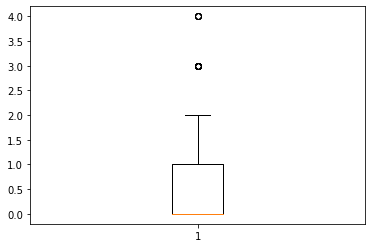

In [49]:
mlp.boxplot(dt.num_major_vessels)

# STATISTICAL EDA

In [50]:
dt.mean()

age                         54.366337
resting_blood_pressure     131.623762
cholesterol                246.264026
max_heart_rate_achieved    149.646865
st_depression                1.039604
num_major_vessels            0.729373
target                       0.544554
dtype: float64

In [51]:
dt.median()

age                         55.0
resting_blood_pressure     130.0
cholesterol                240.0
max_heart_rate_achieved    153.0
st_depression                0.8
num_major_vessels            0.0
target                       1.0
dtype: float64

In [52]:
dt.mode()

,age,gender,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,58.0,male,typical angina,120.0,197,lower than 120mg/ml,ST-T wave abnormality,162.0,no,0.0,downsloping,0.0,fixed defect,1.0
1,NaN,NaN,NaN,NaN,204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
dt.describe()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604,0.729373,0.544554
std,9.082101,17.538143,51.830751,22.905161,1.161075,1.022606,0.498835
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000,0.000000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000,0.000000,1.000000
75%,61.000000,140.000000,274.500000,166.000000,1.600000,1.000000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,4.000000,1.000000


#Feature Engineering

In [54]:
dt.shape

(303, 14)

ONE-HOT Encoding

In [55]:
pd.get_dummies(dt1,drop_first=True)

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target,gender_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/ml,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect
0,63,145,233,150,2.3,0,1,1,0,0,0,0,0,1,0,0,1,0,1,0
1,37,130,250,187,3.5,0,1,1,0,1,0,1,0,0,0,0,1,1,0,0
2,41,130,204,172,1.4,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0
3,56,120,236,178,0.8,0,1,1,1,0,0,1,0,0,0,0,0,1,0,0
4,57,120,354,163,0.6,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,0,0,0,0,0,1,1,0,0,1,1,0,0,0,1
299,45,110,264,132,1.2,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
300,68,144,193,141,3.4,2,0,1,0,0,1,0,0,0,0,1,0,0,0,1
301,57,130,131,115,1.2,1,0,1,0,0,1,1,0,0,1,1,0,0,0,1



# NORMALIZATION AND STANDARDIZATION

Q-Q AND KDE PLOT

<AxesSubplot:xlabel='age', ylabel='Density'>

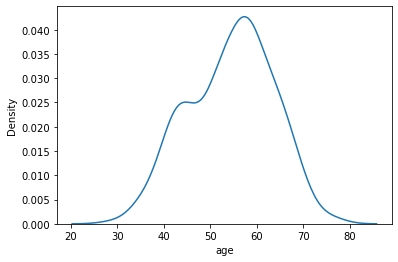

In [56]:
sns.kdeplot(dt.age)    

((array([-2.83587732, -2.53977915, -2.3721488 , -2.25270611, -2.15873923,
         -2.08068092, -2.01355914, -1.95444546, -1.9014639 , -1.85333753,
         -1.80915637, -1.76824812, -1.73010145, -1.69431802, -1.6605812 ,
         -1.62863502, -1.59826945, -1.56930992, -1.54160973, -1.51504433,
         -1.48950705, -1.46490582, -1.44116054, -1.41820113, -1.39596588,
         -1.37440015, -1.35345534, -1.333088  , -1.31325913, -1.29393359,
         -1.27507957, -1.25666822, -1.23867328, -1.22107074, -1.20383863,
         -1.18695677, -1.17040658, -1.1541709 , -1.1382339 , -1.12258087,
         -1.10719816, -1.09207308, -1.07719379, -1.06254924, -1.04812909,
         -1.03392365, -1.01992386, -1.00612116, -0.99250752, -0.97907539,
         -0.96581763, -0.95272748, -0.93979859, -0.92702491, -0.91440073,
         -0.90192062, -0.88957943, -0.87737226, -0.86529445, -0.85334157,
         -0.84150938, -0.82979385, -0.81819112, -0.8066975 , -0.79530947,
         -0.78402367, -0.77283685, -0.

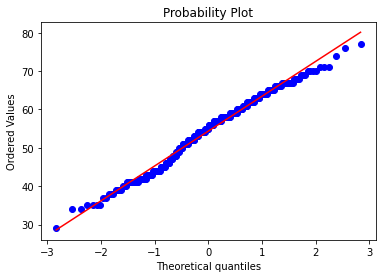

In [57]:
stats.probplot(dt.age,plot=pylab)

In [58]:
def normality(data , feature):
    mlp.figure(figsize=(10,5))
    mlp.subplot(1,2,1)
    sns.kdeplot(data[feature])
    mlp.subplot(1,2,2)
    stats.probplot(data[feature],plot=pylab)
    mlp.show()

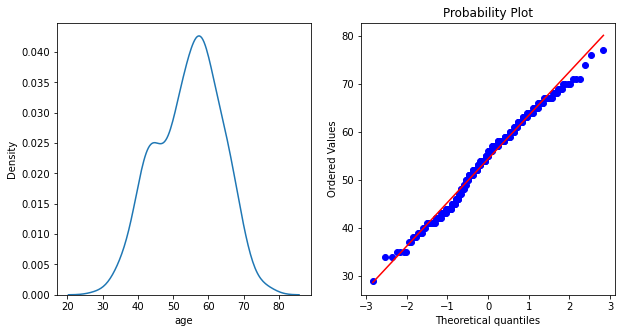

In [59]:
normality(dt,'age')

In [60]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   gender                   303 non-null    object 
 2   chest_pain_type          303 non-null    object 
 3   resting_blood_pressure   303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    object 
 6   rest_ecg                 303 non-null    object 
 7   max_heart_rate_achieved  303 non-null    int64  
 8   exercise_induced_angina  303 non-null    object 
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    object 
 11  num_major_vessels        303 non-null    int64  
 12  thalassemia              303 non-null    object 
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(6), o

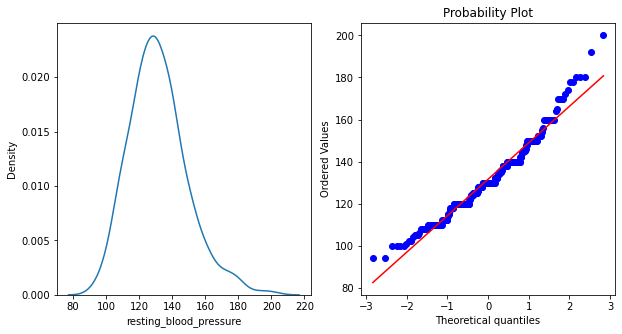

In [61]:
normality(dt,'resting_blood_pressure')

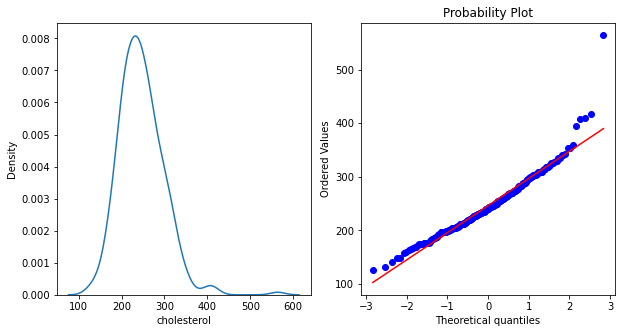

In [62]:
normality(dt,'cholesterol')

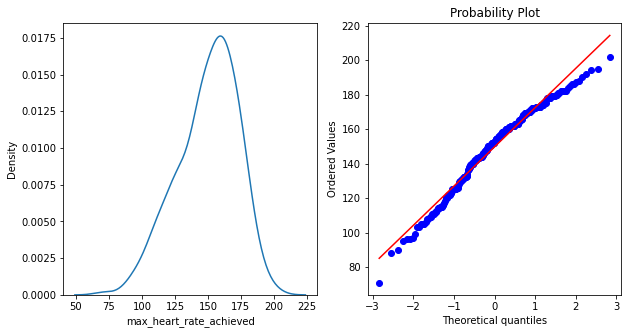

In [63]:
normality(dt,'max_heart_rate_achieved')

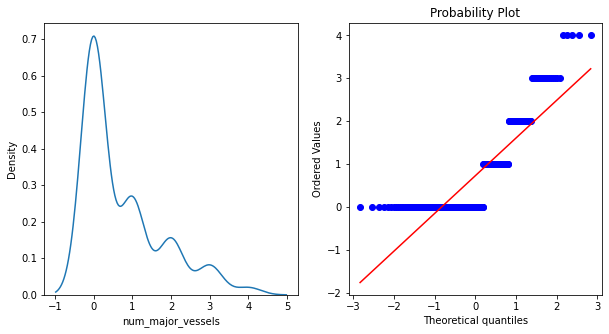

In [64]:
normality(dt,'num_major_vessels')

# TRANSFORMATION(log,sqrt,exp,reciprocal,boxcox)

In [65]:
dt['age_log']=np.log(dt['age'])

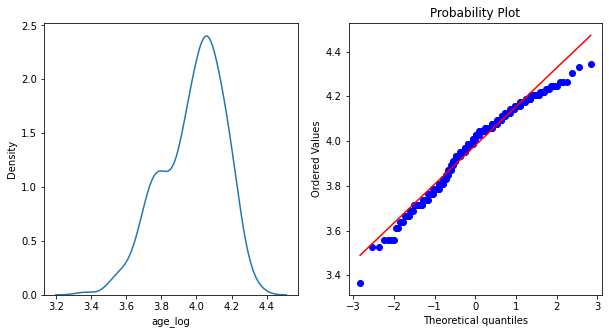

In [66]:
normality(dt,'age_log')

In [67]:
dt['age_sqrt']=np.sqrt(dt['age'])

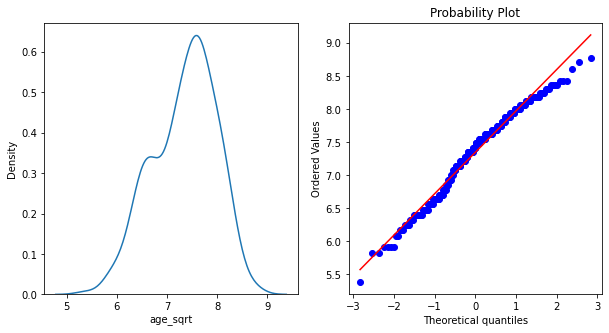

In [68]:
normality(dt,'age_sqrt')

In [69]:
dt['age_exp']=np.exp(dt['age'])

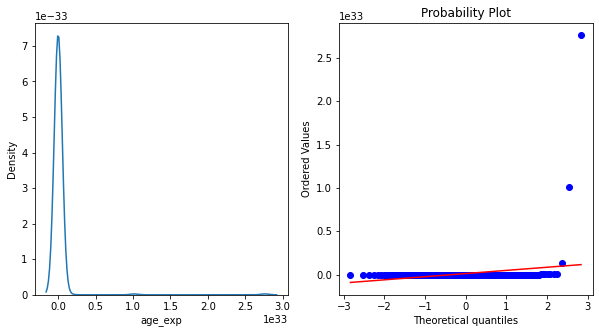

In [70]:
normality(dt,'age_exp')

In [71]:
dt['age_reci']=1/dt['age']

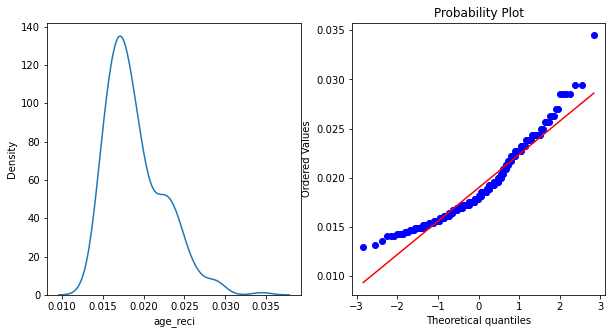

In [72]:
normality(dt,'age_reci')

In [73]:
dt['age_bcx'],parameters =stats.boxcox(dt['age'])

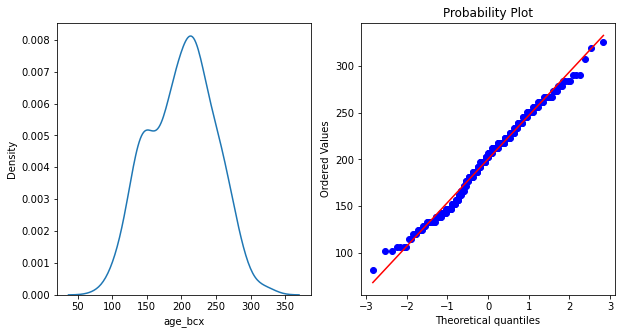

In [74]:
normality(dt,'age_bcx')

In [75]:
dt['resting_bcx'],parameters =stats.boxcox(dt['resting_blood_pressure'])

In [76]:
dt['chl_bcx'],parameters =stats.boxcox(dt['cholesterol'])

In [77]:
dt['mhr_bcx'],parameters =stats.boxcox(dt['max_heart_rate_achieved'])

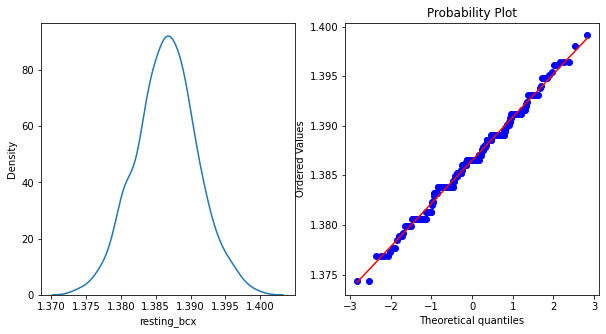

In [78]:
normality(dt,'resting_bcx')

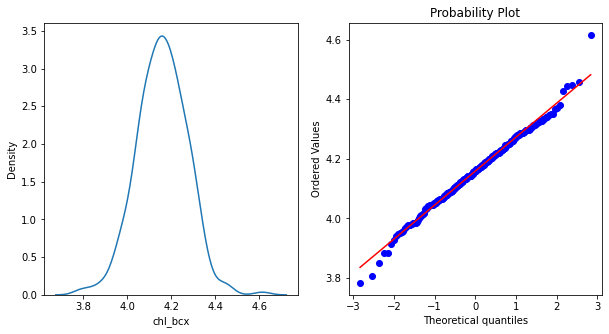

In [79]:
normality(dt,'chl_bcx')

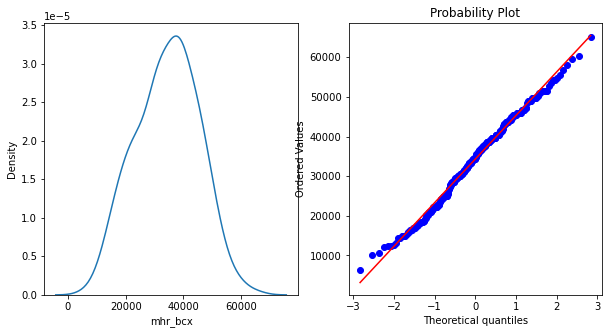

In [80]:
normality(dt,'mhr_bcx')

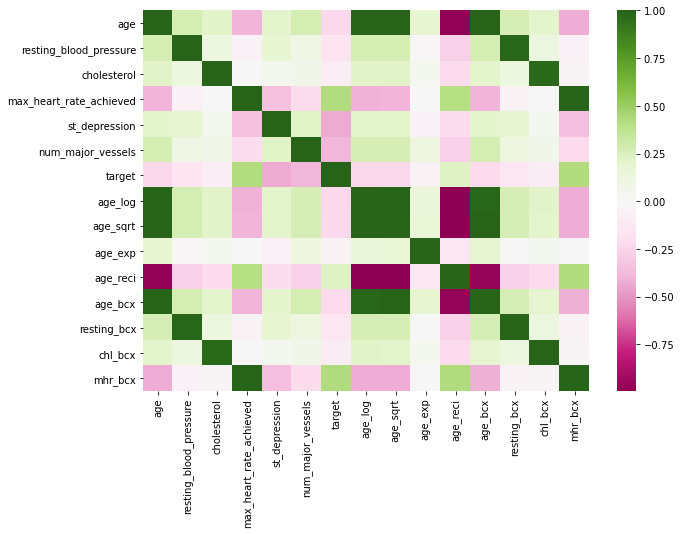

In [84]:
dataplot=sns.heatmap(dt.corr(),cmap="PiYG",annot=False)
mlp.rcParams['figure.figsize']=[10,7]